In [1]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Visualization of Data

In [5]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Checking the Skewness of Data

Skewness: 1.8828757597682129


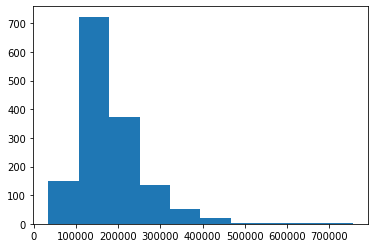

Skew is: 0.12134661989685329


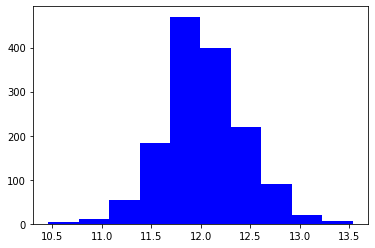

In [9]:
# Determining the Skewness of data 
print ("Skewness:", train_df.SalePrice.skew())

plt.hist(train_df.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train_df['Skewed_SP'] = np.log(train_df['SalePrice']+1)
print ("Skew is:", train_df['Skewed_SP'].skew())
plt.hist(train_df['Skewed_SP'], color='blue')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

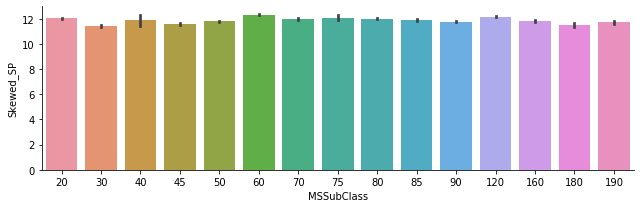

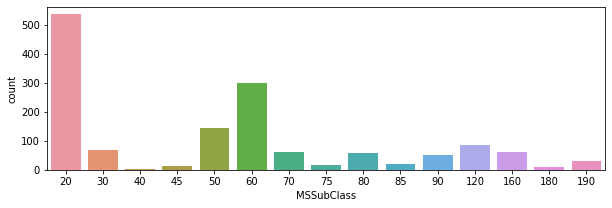

In [10]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train_df)
train_df['MSSubClass'].value_counts()

MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest. 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

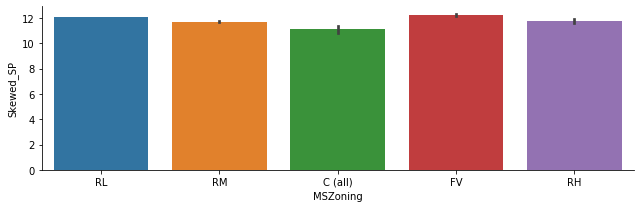

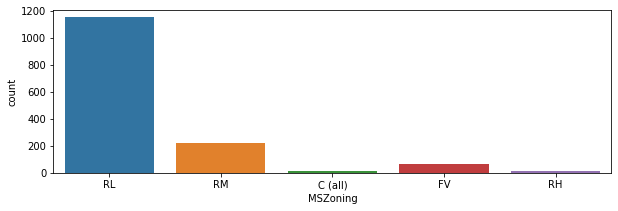

In [11]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train_df, ax=axis1)
train_df['MSZoning'].value_counts()

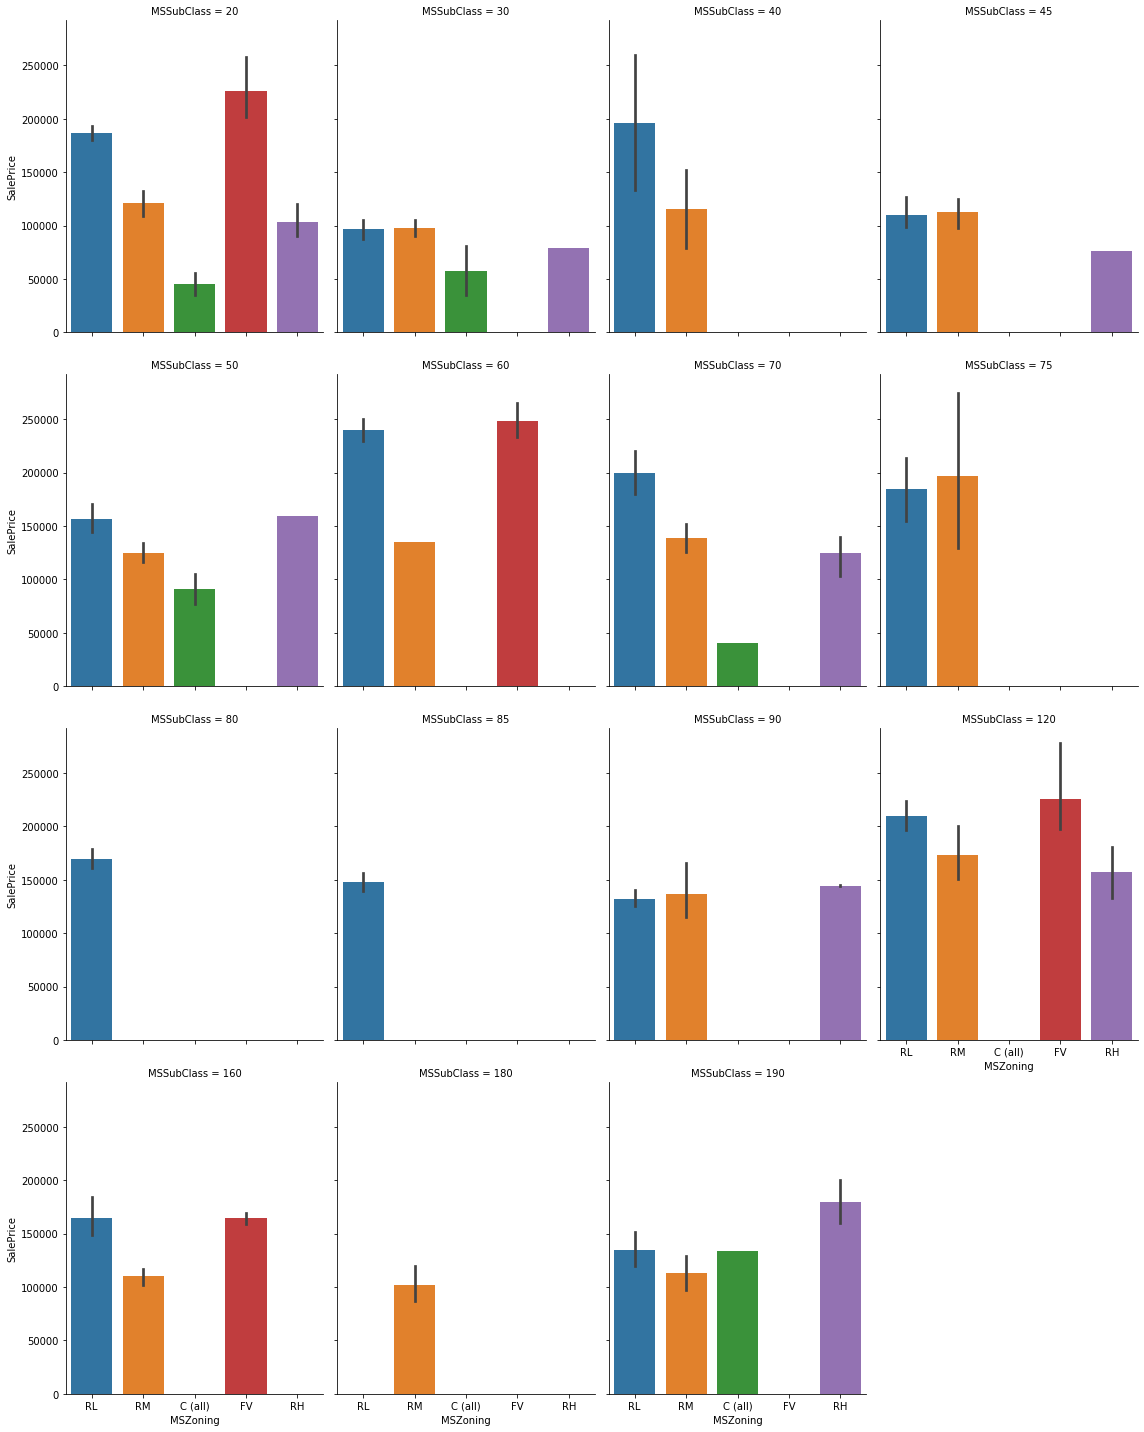

In [12]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train_df, kind='bar', col_wrap=4, aspect=0.8)

NumericalFeatures

In [14]:
numerical_features = train_df.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [15]:
corr = numerical_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice        1.000000
Skewed_SP        0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

Checking the correlation

In [16]:
train_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [19]:
pivot = train_df.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [20]:
pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


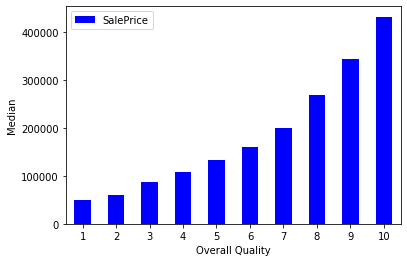

In [21]:
pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

SalePrice varies directly with the Overall quality

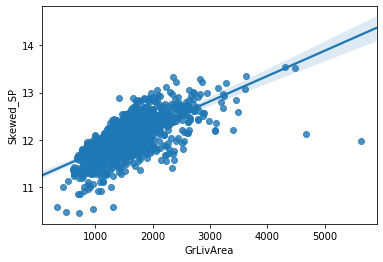

In [22]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train_df)

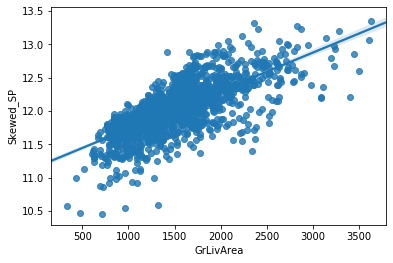

In [25]:
#Removing outliers
train_df = train_df[train_df['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train_df)

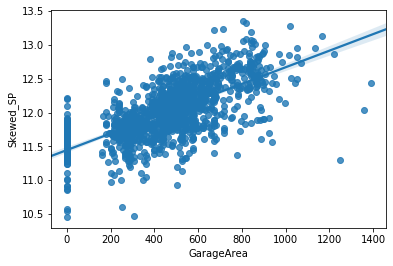

In [26]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train_df)

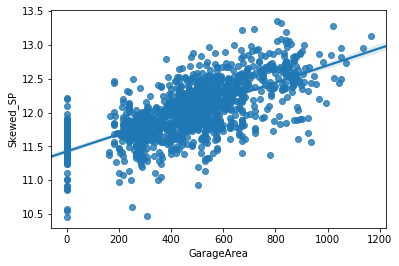

In [27]:
#Removing outliers
train_df = train_df[train_df['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=train_df)

In [28]:
#Removing the null values
nulls = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1447
MiscFeature,1399
Alley,1361
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageFinish,81


In [30]:
print ("Unique_Values", train_df.MiscFeature.unique())

Unique_Values [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [31]:

categorical_feature = train_df.select_dtypes(exclude=[np.number])
categorical_feature.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


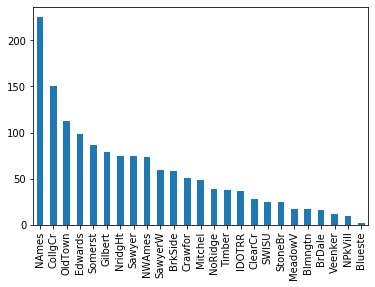

In [32]:
train_df['Neighborhood'].value_counts().plot(kind='bar')

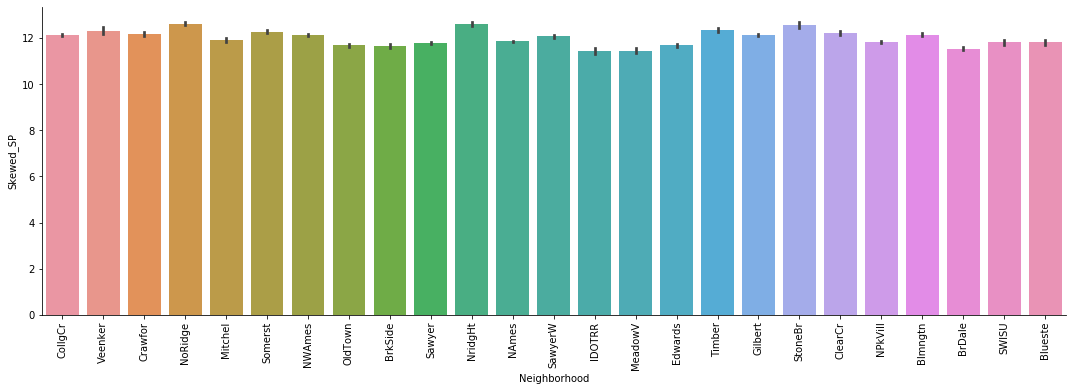

In [33]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train_df, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [34]:
train_df['Condition1'].value_counts()

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [35]:
train_df['Condition2'].value_counts()

Norm      1439
Feedr        6
Artery       2
RRNn         2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

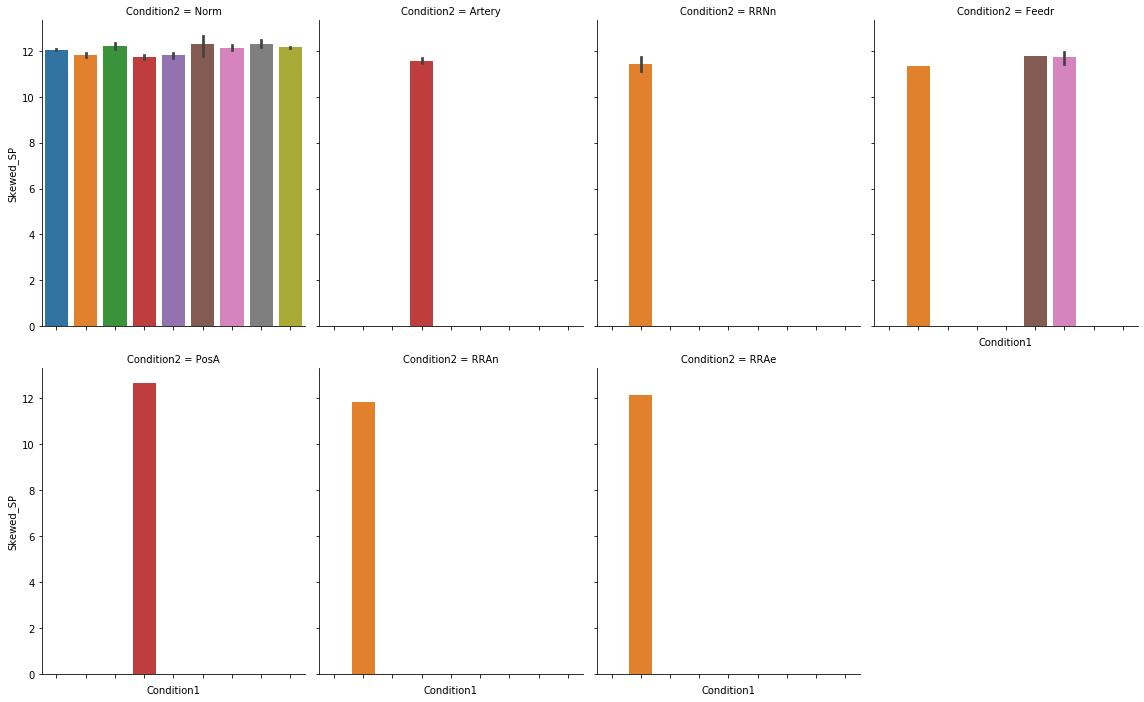

In [36]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train_df, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [37]:
train_df['SaleCondition'].value_counts()

Normal     1195
Partial     121
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [38]:
train_df['SaleType'].value_counts()

WD       1264
New       118
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

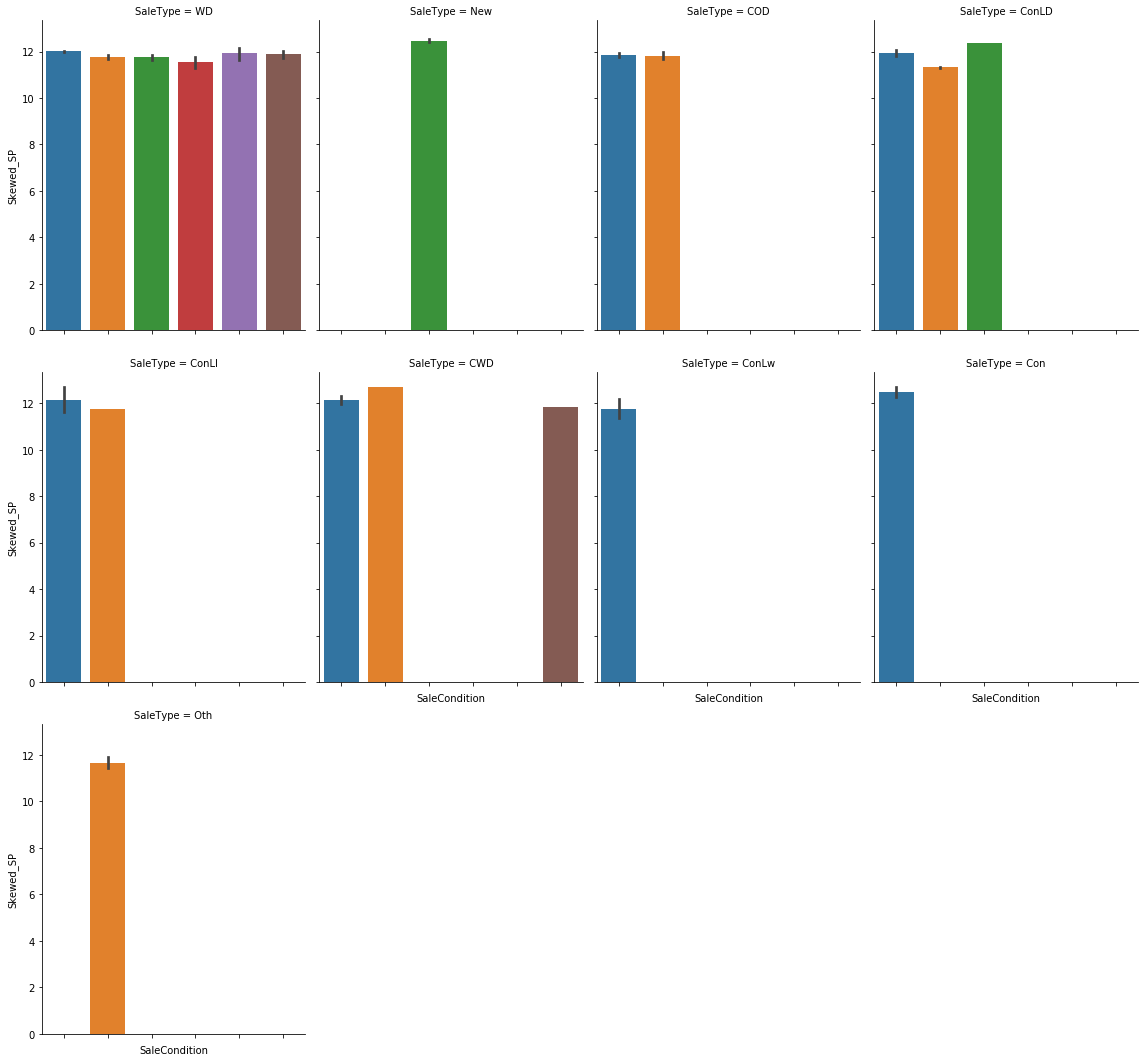

In [39]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train_df, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [41]:
print ("Main Data: \n") 
print (train_df.Street.value_counts(), "\n")

Main Data: 

Pave    1447
Grvl       5
Name: Street, dtype: int64 



In [44]:
# Using One Hot Encoding
train_df['enc_street'] = pd.get_dummies(train_df.Street, drop_first=True)

In [46]:
print ('Values after encoding: \n') 
print (train_df.enc_street.value_counts())

Values after encoding: 

1    1447
0       5
Name: enc_street, dtype: int64


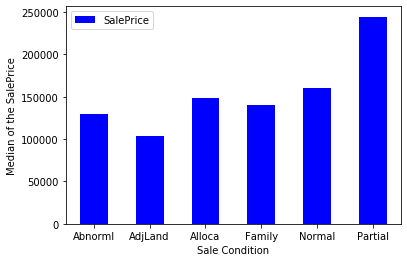

In [49]:
condition_pivotData = train_df.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivotData.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median of the SalePrice')
plt.xticks(rotation=0)
plt.show()

In [51]:
def encode(x): return 1 if x == 'Partial' else 0
train_df['enc_condition'] = train_df.SaleCondition.apply(encode)

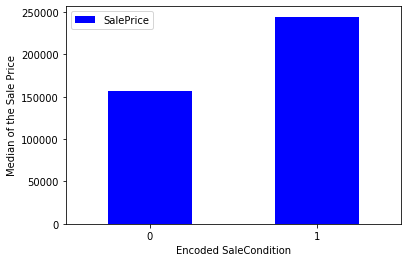

In [52]:
condition_pivotData = train_df.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivotData.plot(kind='bar', color='blue')
plt.xlabel('Encoded SaleCondition')
plt.ylabel('Median of the Sale Price')
plt.xticks(rotation=0)
plt.show()

In [54]:
data = train_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [55]:
sum(data.isnull().sum() != 0)

0

In [56]:
# Linear Model for the  train and test
y = np.log(train_df.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [58]:
from sklearn import linear_model
from sklearn import ensemble

lr = ensemble.GradientBoostingRegressor()


In [59]:
model = lr.fit(X_train, y_train)

In [60]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.9997796307292033


In [61]:
predictions = model.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 3.405431443175679e-05


Text(0.5, 1.0, 'Linear Regression Model')

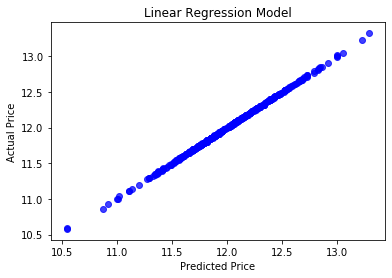

In [63]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

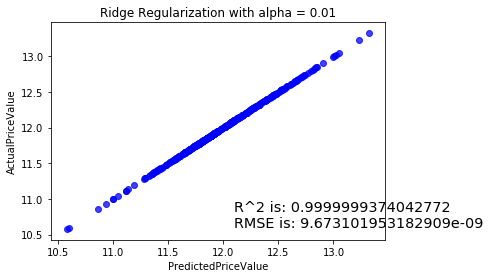

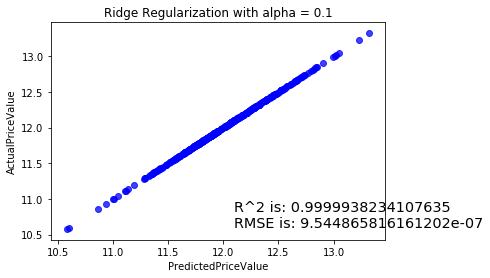

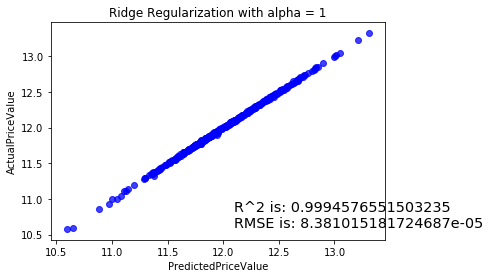

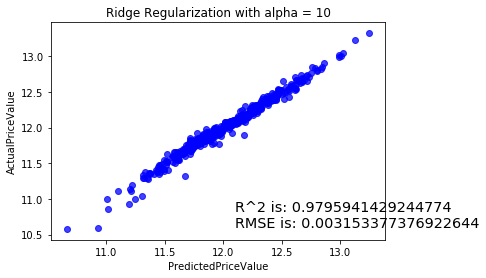

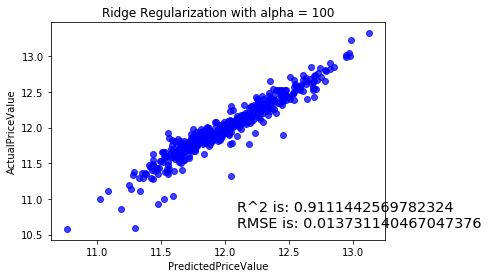

In [66]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('PredictedPriceValue')
    plt.ylabel('ActualPriceValue')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()